# End Point Assesment: Predicting High Impact Papers 
# *Exploratory Data Analyses*

In an effort to assist HDR UK's Impact Committee in scaling their processes, the goal of this project is to provide predictions on a publication's impact by taking into account factors like HDR UK affiliation, open science, team science, PPIE, and more.

The input data includes retrospective monthly measurements of each criteria alongside bibliometric data.

## 1. Set up
First, run the following cell to:

* import pandas with an alias of pd
* import visualisation packages and set plotting styling
* read a CSV containing the retrospective scoring data
* create a DataFrame df containing the data
* take a look at the first few/last rows of the DataFrame

In [1]:
##Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

pd.set_option('display.max_rows', 250)
%matplotlib inline
#print(plt.style.available)

<ipython-input-1-2ce00d61d687>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
##Import data
df = pd.read_csv(r'C:\Users\HollydawnMurray\Documents\Collated_Impact_Commitee_Scores.csv')

print('Dataset Shape:', df.shape)

df.head()



Dataset Shape: (383, 30)


,Identifier,Authors,Title,National Priority,OA,P1,P2,P3,S total,S1,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,N,"C,D,","Y,Y,",3,0.433333333,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,Y,"A,B","Y,N",3,0.483333333,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,Y,"A,C","Y,Y",5,0.616666667,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,N,"B,A","N,Y",5,0.633333333,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,Y,"B/A,B","Y,N",6,0.783333333,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df has one row of data for each publication.  Checking the datatypes for each column

In [3]:
df.dtypes

Identifier            object
Authors               object
Title                 object
National Priority     object
OA                    object
P1                    object
P2                    object
P3                    object
S total               object
S1                   float64
S2                   float64
S3                   float64
S4                   float64
S5                   float64
S6                   float64
Impact Selection      object
Unnamed: 16          float64
Unnamed: 17          float64
Unnamed: 18          float64
Unnamed: 19          float64
Unnamed: 20          float64
Unnamed: 21          float64
Unnamed: 22          float64
Unnamed: 23          float64
Unnamed: 24          float64
Unnamed: 25          float64
Unnamed: 26          float64
Unnamed: 27          float64
Unnamed: 28          float64
Unnamed: 29          float64
dtype: object

## 2. Tidy Data
The dataset has several unnamed columns that are not needed and (as noted above) 'S total' is an object and several columns need to be mapped to integers. 

Starting from a copy of df, create a new dataframe called clean_df with the following changes:
* Drop all unnamed columns
* Change column data type for 'S total' to float64
* Change column type for 'OA' to binary

In [4]:
clean_df=df.copy()
clean_df.drop(["Unnamed: 16", "Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25", "Unnamed: 26", "Unnamed: 27", "Unnamed: 28", "Unnamed: 29"],  axis=1, inplace=True)
clean_df['S total']= pd.to_numeric(clean_df['S total'], errors='coerce') #coerce sets errors to NaN
clean_df['OA'] = clean_df['OA'].map({'Y': 1, 'N': 0})
clean_df.head()

,Identifier,Authors,Title,National Priority,OA,P1,P2,P3,S total,S1,S2,S3,S4,S5,S6,Impact Selection
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,"C,D,","Y,Y,",3,0.433333,3.0,4.0,5.0,4.0,5.0,5.0,N
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,"A,B","Y,N",3,0.483333,5.0,5.0,4.0,3.0,6.0,6.0,N
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,"A,C","Y,Y",5,0.616667,5.0,8.0,9.0,3.0,6.0,6.0,Y
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,"B,A","N,Y",5,0.633333,8.0,7.0,8.0,3.0,6.0,6.0,N
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,"B/A,B","Y,N",6,0.783333,7.0,10.0,7.0,8.0,7.0,8.0,Y


Next, several objects need to be mapped to integers.

Starting from our clean df:
* List values from P1 and P2 columns
* Create mapping

In [5]:
P1_list = clean_df['P1'].unique()
P2_list = clean_df['P2'].unique()
print (P1_list)

['C,D,' 'A,B' 'A,C' 'B,A' 'B/A,B' 'C,C' 'A,A' 'B,B/A' 'D,D' 'A,A/B' 'B,B'
 'C,B' 'D,C/D' 'C/D,B' 'C,B/C' 'B,C' 'D' 'B,B ' 'D,A' 'B,D' 'A' 'C,A'
 'B ,C' 'B' 'D,C' nan 'C' 'D,B' 'C,D' 'B,A/B' 'B/C,c' 'A,c' 'B,c' 'C,A,C'
 'B,B,A' 'B,C,C' 'A,A,A' 'A,NOT' 'Not,NOT' 'D,B,C']


In [6]:
clean_df.head()

,Identifier,Authors,Title,National Priority,OA,P1,P2,P3,S total,S1,S2,S3,S4,S5,S6,Impact Selection
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,"C,D,","Y,Y,",3,0.433333,3.0,4.0,5.0,4.0,5.0,5.0,N
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,"A,B","Y,N",3,0.483333,5.0,5.0,4.0,3.0,6.0,6.0,N
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,"A,C","Y,Y",5,0.616667,5.0,8.0,9.0,3.0,6.0,6.0,Y
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,"B,A","N,Y",5,0.633333,8.0,7.0,8.0,3.0,6.0,6.0,N
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,"B/A,B","Y,N",6,0.783333,7.0,10.0,7.0,8.0,7.0,8.0,Y


In [7]:
print(P1_list)

['C,D,' 'A,B' 'A,C' 'B,A' 'B/A,B' 'C,C' 'A,A' 'B,B/A' 'D,D' 'A,A/B' 'B,B'
 'C,B' 'D,C/D' 'C/D,B' 'C,B/C' 'B,C' 'D' 'B,B ' 'D,A' 'B,D' 'A' 'C,A'
 'B ,C' 'B' 'D,C' nan 'C' 'D,B' 'C,D' 'B,A/B' 'B/C,c' 'A,c' 'B,c' 'C,A,C'
 'B,B,A' 'B,C,C' 'A,A,A' 'A,NOT' 'Not,NOT' 'D,B,C']


In [8]:
clean_df['P1']=clean_df['P1'].map({'C,C': 4, 'A,A': 8, 'B,B/A': 6.5, 'C/D,B': 4.5, 'B,B': 6, 'B':6, 'D,C': 3, 'C': 4, 'D,B': 4, 'B,A/B': 6.5, 'B/C,c': 4.5, 'A,c': 6, 'B,c': 5, 'C,A,C': 6, 'B,B,A': 6, 'C,D,': 3, 'A,B': 5, 'A,C': 6, 'B,A': 5, 'B/A,B': 6.5, 'D,D': 2, 'A,A/B': 7.5, 'B,B': 6, 'C,B': 5, 'D,C/D': 2.5, 'C,B/C': 4.5, 'B,C': 5, 'D': 2, 'B,B ':6, 'D,A': 5, 'B,D': 4, 'A':8, 'C,A': 6, 'B ,C': 5, 'B': 6, 'D,C': 3, 'C,D': 3, 'B,A/B': 6.5, 'B/C,c': 4.5, 'A,c': 5, 'B,c': 5, 'C,A,C': 6, 'B,B,A': 7, 'B,C,C': 5, 'A,A,A': 8, 'A,NOT': 4, 'Not,NOT': 0, 'D,B,C': 3.5})
clean_df.head()

,Identifier,Authors,Title,National Priority,OA,P1,P2,P3,S total,S1,S2,S3,S4,S5,S6,Impact Selection
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,3.0,"Y,Y,",3,0.433333,3.0,4.0,5.0,4.0,5.0,5.0,N
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,5.0,"Y,N",3,0.483333,5.0,5.0,4.0,3.0,6.0,6.0,N
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,6.0,"Y,Y",5,0.616667,5.0,8.0,9.0,3.0,6.0,6.0,Y
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,5.0,"N,Y",5,0.633333,8.0,7.0,8.0,3.0,6.0,6.0,N
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,6.5,"Y,N",6,0.783333,7.0,10.0,7.0,8.0,7.0,8.0,Y


In [9]:
print(P2_list)

['Y,Y,' 'Y,N' 'Y,Y' 'N,Y' 'N,N' 'N' 'Y' nan 'Y,y' 'Y ,Y' ' ' 'B' 'y'
 'Y,Y,Y' 'N,SUITABLE' 'Original,SUITABLE' 'N,Y,N']


In [10]:
clean_df['P2']=clean_df['P2'].map({'Y,Y,': 4, 'Y,N': 2, 'Y,Y': 4, 'N,Y': 2, 'N,N': 0, 'N':0, 'Y':4, 'Y,y': 4, 'Y ,Y': 4, 'y': 4, 'Y,Y,Y':4, 'N,SUITABLE':2, 'Original,SUITABLE': 4, 'N,Y,N': 2})
clean_df.head()

,Identifier,Authors,Title,National Priority,OA,P1,P2,P3,S total,S1,S2,S3,S4,S5,S6,Impact Selection
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,3.0,4.0,3,0.433333,3.0,4.0,5.0,4.0,5.0,5.0,N
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,5.0,2.0,3,0.483333,5.0,5.0,4.0,3.0,6.0,6.0,N
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,6.0,4.0,5,0.616667,5.0,8.0,9.0,3.0,6.0,6.0,Y
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,5.0,2.0,5,0.633333,8.0,7.0,8.0,3.0,6.0,6.0,N
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,6.5,2.0,6,0.783333,7.0,10.0,7.0,8.0,7.0,8.0,Y


Impact Selections were only positively coded throughout so need to account for N and blanks as both being 'not selected'. Replace blank rows in Impact Selection (NaN) with 0. Map Y to 1 and N to 0.

In [11]:
clean_df['Impact Selection']=clean_df['Impact Selection'].map({'Y': 1, 'N': 0})
clean_df['Impact Selection']= pd.to_numeric(clean_df['Impact Selection'], errors='coerce') #coerce sets errors to NaN
clean_df['Impact Selection'] = clean_df['Impact Selection'].replace(np.nan, 0) #replace NaN with 0
clean_df.head()

,Identifier,Authors,Title,National Priority,OA,P1,P2,P3,S total,S1,S2,S3,S4,S5,S6,Impact Selection
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,3.0,4.0,3,0.433333,3.0,4.0,5.0,4.0,5.0,5.0,0.0
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,5.0,2.0,3,0.483333,5.0,5.0,4.0,3.0,6.0,6.0,0.0
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,6.0,4.0,5,0.616667,5.0,8.0,9.0,3.0,6.0,6.0,1.0
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,5.0,2.0,5,0.633333,8.0,7.0,8.0,3.0,6.0,6.0,0.0
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,6.5,2.0,6,0.783333,7.0,10.0,7.0,8.0,7.0,8.0,1.0


Check for missing values and duplicates.

In [12]:
#number of missing values per column
clean_df.isnull().sum()

Identifier            1
Authors               1
Title                 1
National Priority     2
OA                    3
P1                   14
P2                   14
P3                    0
S total               1
S1                    1
S2                    1
S3                    1
S4                    1
S5                    1
S6                    1
Impact Selection      0
dtype: int64

In [13]:
clean_df.shape

(383, 16)

In [14]:
#drop all rows with missing values (as per above)
clean_df = clean_df.dropna()
clean_df.shape

(365, 16)

In [15]:
#number of duplicates in df
sum(clean_df.duplicated())

0

In [16]:
#number of duplicates by identifier
sum(clean_df.duplicated('Identifier'))

15

In [17]:
#clean duplicates by keeping only most recent (ie last)
clean_df = clean_df.drop_duplicates(['Identifier'], keep='last')
clean_df.shape


(350, 16)

In [18]:
#rename columns for interpretability
clean_df.rename(columns = {"P1": "HDR UK Affiliation", "P2": "Impact", "P3": "Research Excellence", "S1": "Team Science", "S2": "Scale", "S3": "Open Science", "S4": "PP Involvement", "S5": "PP Impact", "S6": "EDI", "S total": "Overall" }, inplace="true")

In [19]:
#check types
clean_df.dtypes

Identifier              object
Authors                 object
Title                   object
National Priority       object
OA                     float64
HDR UK Affiliation     float64
Impact                 float64
Research Excellence     object
Overall                float64
Team Science           float64
Scale                  float64
Open Science           float64
PP Involvement         float64
PP Impact              float64
EDI                    float64
Impact Selection       float64
dtype: object

In [20]:
clean_df['Research Excellence'] = clean_df['Research Excellence'].astype(float)
#check types
clean_df.dtypes


Identifier              object
Authors                 object
Title                   object
National Priority       object
OA                     float64
HDR UK Affiliation     float64
Impact                 float64
Research Excellence    float64
Overall                float64
Team Science           float64
Scale                  float64
Open Science           float64
PP Involvement         float64
PP Impact              float64
EDI                    float64
Impact Selection       float64
dtype: object

## 3. Combine data
To provide further context and richness, the dataset above can be complemented with bibliographic data as follows:
* Generate at list of DOIs from the dataset 
* Input list of DOIs into Dimensions AI (note: this is not part of this workbook as we do not have API access)
* Export data from Dimensions AI as a CSV file (note: this is not part of this workbook as we do not have API access)
* Import the data from Dimensions AI into this notebook
* Combine the Dimensions AI dataset with the clean dataframe 

In [21]:
list_of_DOIs = clean_df['Identifier'].tolist()
list_of_DOIs

['https://doi.org/10.1093/pubmed/fdaa115',
 'https://doi.org/10.1111/anae.15457',
 'https://doi.org/10.1016/S2589-7500(21)00017-0',
 'https://doi.org/10.1038/s41588-021-00783-5',
 '10.1136/bmj.n826',
 'https://doi.org/10.1177/1740774520976617',
 'https://doi.org/10.1016/j.compbiomed.2021.104360',
 'https://doi.org/10.1186/s12916-021-01940-7',
 'https://doi.org/10.1016/S2666-7568(21)00004-0',
 'https://doi.org/10.1038/s41746-021-00406-7',
 'https://doi.org/10.1093/ageing/afab035',
 'https://doi.org/10.1002/jha2.182',
 'https://dx.doi.org/10.2139/ssrn.3786058',
 '10.1016/S0140-6736(21)00897-7',
 '10.1016/S0140-6736(21)00634-6',
 '10.1016/S0140-6736(21)00677-2',
 'https://doi.org/10.1016/s0140-6736(21)00676-0',
 'https://doi.org/10.1126/science.abf0874',
 'https://doi.org/10.1016/j.mvr.2021.104167',
 'https://doi.org/10.1016/j.cmpb.2021.105969',
 'https://doi.org/10.1098/rstb.2020.0266',
 'https://doi.org/10.1186/s12916-021-02000-w',
 'https://doi.org/10.1136/bmjopen-2021-049721',
 'http:

A quick glance at the list of DOIs shows that one object is not in fact a DOI, below this is removed from the dataframe using its location.

In [22]:
clean_df.head(30)

,Identifier,Authors,Title,National Priority,OA,HDR UK Affiliation,Impact,Research Excellence,Overall,Team Science,Scale,Open Science,PP Involvement,PP Impact,EDI,Impact Selection
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,3.0,4.0,3.0,0.433333,3.0,4.0,5.0,4.0,5.0,5.0,0.0
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,5.0,2.0,3.0,0.483333,5.0,5.0,4.0,3.0,6.0,6.0,0.0
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,6.0,4.0,5.0,0.616667,5.0,8.0,9.0,3.0,6.0,6.0,1.0
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,5.0,2.0,5.0,0.633333,8.0,7.0,8.0,3.0,6.0,6.0,0.0
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,6.5,2.0,6.0,0.783333,7.0,10.0,7.0,8.0,7.0,8.0,1.0
6,https://doi.org/10.1177/1740774520976617,Love et al.,Making a distinction between data cleaning and...,CT,0.0,8.0,4.0,2.0,0.316667,4.0,3.0,3.0,3.0,3.0,3.0,0.0
7,https://doi.org/10.1016/j.compbiomed.2021.104360,Slater et al.,Towards similarity-based differential diagnost...,AA,1.0,6.5,4.0,6.0,0.533333,5.0,7.0,9.0,3.0,5.0,5.0,1.0
8,https://doi.org/10.1186/s12916-021-01940-7,Banerjee et al.,Machine learning for subtype definition and ri...,HP,1.0,4.0,2.0,4.0,0.416667,5.0,4.0,5.0,4.0,5.0,5.0,0.0
9,https://doi.org/10.1016/S2666-7568(21)00004-0,Street et al,The use of linked routine data to optimise cal...,BC,1.0,2.0,2.0,4.0,0.516667,7.0,7.0,5.0,3.0,5.0,4.0,0.0
10,https://doi.org/10.1038/s41746-021-00406-7,Teo et al.,Real-time clinician text feeds from electronic...,BC,1.0,4.0,0.0,5.0,0.550000,4.0,4.0,6.0,7.0,6.0,6.0,0.0


In [23]:
clean_df=clean_df.drop(df.index[[26]])
clean_df.head(30)

,Identifier,Authors,Title,National Priority,OA,HDR UK Affiliation,Impact,Research Excellence,Overall,Team Science,Scale,Open Science,PP Involvement,PP Impact,EDI,Impact Selection
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,3.0,4.0,3.0,0.433333,3.0,4.0,5.0,4.0,5.0,5.0,0.0
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,5.0,2.0,3.0,0.483333,5.0,5.0,4.0,3.0,6.0,6.0,0.0
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,6.0,4.0,5.0,0.616667,5.0,8.0,9.0,3.0,6.0,6.0,1.0
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,5.0,2.0,5.0,0.633333,8.0,7.0,8.0,3.0,6.0,6.0,0.0
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,6.5,2.0,6.0,0.783333,7.0,10.0,7.0,8.0,7.0,8.0,1.0
6,https://doi.org/10.1177/1740774520976617,Love et al.,Making a distinction between data cleaning and...,CT,0.0,8.0,4.0,2.0,0.316667,4.0,3.0,3.0,3.0,3.0,3.0,0.0
7,https://doi.org/10.1016/j.compbiomed.2021.104360,Slater et al.,Towards similarity-based differential diagnost...,AA,1.0,6.5,4.0,6.0,0.533333,5.0,7.0,9.0,3.0,5.0,5.0,1.0
8,https://doi.org/10.1186/s12916-021-01940-7,Banerjee et al.,Machine learning for subtype definition and ri...,HP,1.0,4.0,2.0,4.0,0.416667,5.0,4.0,5.0,4.0,5.0,5.0,0.0
9,https://doi.org/10.1016/S2666-7568(21)00004-0,Street et al,The use of linked routine data to optimise cal...,BC,1.0,2.0,2.0,4.0,0.516667,7.0,7.0,5.0,3.0,5.0,4.0,0.0
10,https://doi.org/10.1038/s41746-021-00406-7,Teo et al.,Real-time clinician text feeds from electronic...,BC,1.0,4.0,0.0,5.0,0.550000,4.0,4.0,6.0,7.0,6.0,6.0,0.0


The DOIs above are then copied and pasted into Dimension AI.  Which then queries its database for bibliographic information for each identifier and exports this as an excel file.

In [24]:
##Import Dimensions data
dimensions_df = pd.read_csv(r'C:\Users\HollydawnMurray\Desktop\Dimensions-EPA.csv')

print('Dataset Shape:', dimensions_df.shape)

dimensions_df.head()


Dataset Shape: (342, 54)


,Rank,Publication ID,Identifier,PMID,PMCID,ISBN,Title,Abstract,Acknowledgements,Funding,...,Fields of Research (ANZSRC 2020),RCDC Categories,HRCS HC Categories,HRCS RAC Categories,Health Research Areas,Broad Research Areas,Cancer Types,CSO Categories,Units of Assessment,Sustainable Development Goals
0,3764,pub.1140119170,https://doi.org/10.1097/ede.0000000000001393,34348396.0,PMC8318567,NaN,Weight Change and the Onset of Cardiovascular ...,BACKGROUND: Cross-sectional measures of body m...,NaN,NaN,...,42 Health Sciences; 4202 Epidemiology; 4203 He...,Aging; Cardiovascular; Clinical Research; Hear...,Cardiovascular; Stroke,NaN,Clinical,Public Health,Not Site-Specific Cancer,NaN,"A02 Public Health, Health Services and Primary...",3 Good Health and Well Being
1,3759,pub.1144572400,https://doi.org/10.3390/jpm12010086,35055401.0,PMC8779953,NaN,Predicting Hospital Readmission for Campylobac...,(1) Background: This study investigates influe...,NaN,NaN,...,32 Biomedical and Clinical Sciences; 3202 Clin...,Clinical Research,NaN,NaN,NaN,Clinical Medicine and Science,NaN,NaN,"A03 Allied Health Professions, Dentistry, Nurs...",NaN
2,3759,pub.1143039918,https://doi.org/10.3390/biomedicines9111636,34829865.0,PMC8615894,NaN,Machine Learning-Based Identification of Poten...,Non-alcoholic fatty liver disease (NAFLD) is a...,NaN,NaN,...,31 Biological Sciences; 3102 Bioinformatics an...,Chronic Liver Disease and Cirrhosis; Digestive...,Inflammatory and immune system; Oral and gastr...,NaN,NaN,NaN,NaN,NaN,B11 Computer Science and Informatics,3 Good Health and Well Being
3,3759,pub.1144542560,https://doi.org/10.1016/j.retram.2022.103333,35104687.0,PMC8743599,NaN,A common TMPRSS2 variant has a protective effe...,BACKGROUND: The human protein transmembrane pr...,This research was conducted using the UK BioBa...,"The Wellcome Trust, UKRI, MRC/UKRI, Howard Hug...",...,32 Biomedical and Clinical Sciences; 3207 Medi...,Clinical Research; Emerging Infectious Disease...,NaN,2.1 Biological and endogenous factors,NaN,Clinical Medicine and Science,Not Site-Specific Cancer,NaN,"A03 Allied Health Professions, Dentistry, Nurs...",3 Good Health and Well Being
4,3759,pub.1144513954,https://doi.org/10.3390/metabo12010029,35050151.0,PMC8780653,NaN,Integration of Metabolomic and Clinical Data I...,Recent advances in emergency medicine and the ...,NaN,NaN,...,32 Biomedical and Clinical Sciences; 3202 Clin...,Clinical Research; Physical Injury - Accidents...,NaN,NaN,Clinical,Clinical Medicine and Science,NaN,NaN,A01 Clinical Medicine,3 Good Health and Well Being


In [25]:
#Merge bibliographic data with initial dataframe
final_df = clean_df.merge(dimensions_df, on = "Identifier",  how = "left")
#check merged df
print('Dataset Shape:', final_df.shape)


Dataset Shape: (349, 69)


Shape of final DF suggests there were 7 entries in the initial DF that Dimensions did not have data for and/or the identifiers did not match to merge.

In [26]:
final_df.head()

,Identifier,Authors_x,Title_x,National Priority,OA,HDR UK Affiliation,Impact,Research Excellence,Overall,Team Science,...,Fields of Research (ANZSRC 2020),RCDC Categories,HRCS HC Categories,HRCS RAC Categories,Health Research Areas,Broad Research Areas,Cancer Types,CSO Categories,Units of Assessment,Sustainable Development Goals
0,https://doi.org/10.1093/pubmed/fdaa115,Syed and Gilbert,Are children who are home from school at an in...,PH,0.0,3.0,4.0,3.0,0.433333,3.0,...,42 Health Sciences; 4202 Epidemiology; 4203 He...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://doi.org/10.1111/anae.15457,Lyons et al.,Impact of a physician - critical care practiti...,PH,1.0,5.0,2.0,3.0,0.483333,5.0,...,32 Biomedical and Clinical Sciences; 3202 Clin...,Clinical Research; Emergency Care; Health Serv...,Injuries and accidents,7.3 Management and decision making; 8.1 Organi...,Health services & systems,Health Services Research,NaN,NaN,A01 Clinical Medicine,3 Good Health and Well Being
2,https://doi.org/10.1016/S2589-7500(21)00017-0,Mansfield et al,Indirect acute effects of the COVID-19 pandemi...,PH,1.0,6.0,4.0,5.0,0.616667,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://doi.org/10.1038/s41588-021-00783-5,Lambert et al,The Polygenic Score Catalog as an open databas...,UCD,0.0,5.0,2.0,5.0,0.633333,8.0,...,31 Biological Sciences; 3102 Bioinformatics an...,Genetics,NaN,NaN,NaN,NaN,NaN,NaN,A01 Clinical Medicine,NaN
4,10.1136/bmj.n826,Wood et al,Linked electronic health records for research ...,UCD,1.0,6.5,2.0,6.0,0.783333,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Visualise
Explore relationships between variables through simple visualisations.

In [27]:
final_df.describe()

,OA,HDR UK Affiliation,Impact,Research Excellence,Overall,Team Science,Scale,Open Science,PP Involvement,PP Impact,...,Rank,PMID,ISBN,Anthology title,PubYear,Volume,Times cited,Recent citations,RCR,FCR
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,330.000000,3.260000e+02,0.0,0.0,330.000000,327.000000,327.000000,327.000000,99.000000,123.000000
mean,0.819484,5.338109,2.945559,4.707736,0.458338,5.489971,5.435530,5.309456,3.793696,5.020057,...,3478.115152,3.514504e+07,NaN,NaN,2021.593939,56.782875,11.516820,11.495413,3.704848,13.039675
std,0.385169,1.450429,1.481656,1.800534,0.163877,2.118077,2.084287,2.024689,1.867097,1.818535,...,454.688121,6.916814e+05,NaN,NaN,0.515970,94.960011,27.888013,27.833408,5.987172,29.743908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,714.000000,3.272871e+07,NaN,NaN,2020.000000,2.000000,0.000000,0.000000,0.140000,0.000000
25%,1.000000,4.000000,2.000000,3.000000,0.360000,4.000000,4.000000,4.000000,3.000000,4.000000,...,3463.000000,3.473670e+07,NaN,NaN,2021.000000,12.000000,1.000000,1.000000,0.605000,1.645000
50%,1.000000,5.000000,4.000000,5.000000,0.470000,5.000000,5.000000,5.000000,4.000000,5.000000,...,3553.000000,3.511400e+07,NaN,NaN,2022.000000,19.000000,4.000000,4.000000,1.550000,4.330000
75%,1.000000,6.000000,4.000000,6.000000,0.550000,7.000000,7.000000,6.000000,4.000000,6.000000,...,3639.000000,3.551656e+07,NaN,NaN,2022.000000,51.000000,10.000000,10.000000,3.500000,11.560000
max,1.000000,8.000000,4.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7130.000000,3.633252e+07,NaN,NaN,2023.000000,611.000000,277.000000,277.000000,31.550000,265.840000


In [28]:
final_df.corr()

,OA,HDR UK Affiliation,Impact,Research Excellence,Overall,Team Science,Scale,Open Science,PP Involvement,PP Impact,...,Rank,PMID,ISBN,Anthology title,PubYear,Volume,Times cited,Recent citations,RCR,FCR
OA,1.000000,0.083846,-0.002164,0.151600,0.232420,0.158040,0.141166,0.215544,0.139864,0.115951,...,0.022779,-0.044172,NaN,NaN,0.051157,0.007514,0.022990,0.023217,0.017178,0.048597
HDR UK Affiliation,0.083846,1.000000,0.128933,-0.005516,-0.021486,-0.047532,0.136979,0.013684,0.044931,0.066056,...,0.004497,0.045066,NaN,NaN,-0.006763,-0.078638,0.027979,0.028148,0.113835,0.079031
Impact,-0.002164,0.128933,1.000000,0.276229,0.228430,0.198065,0.275684,0.118663,0.052020,0.261694,...,0.019467,-0.007423,NaN,NaN,-0.008396,0.107684,0.122175,0.122157,0.271182,0.168856
Research Excellence,0.151600,-0.005516,0.276229,1.000000,0.622699,0.462626,0.514113,0.459992,0.294861,0.515193,...,0.082473,-0.112900,NaN,NaN,-0.067370,0.098759,0.199089,0.199825,0.209654,0.175629
Overall,0.232420,-0.021486,0.228430,0.622699,1.000000,0.544276,0.615370,0.612469,0.471615,0.619439,...,0.032734,-0.175403,NaN,NaN,-0.185560,0.121910,0.245302,0.245575,0.228750,0.243386
Team Science,0.158040,-0.047532,0.198065,0.462626,0.544276,1.000000,0.511306,0.477146,0.325731,0.528616,...,-0.061743,-0.100593,NaN,NaN,-0.049742,0.059498,0.139105,0.139144,0.142334,0.161856
Scale,0.141166,0.136979,0.275684,0.514113,0.615370,0.511306,1.000000,0.604644,0.331071,0.626934,...,0.035102,-0.122048,NaN,NaN,-0.098748,0.137324,0.154547,0.154713,0.149017,0.148950
Open Science,0.215544,0.013684,0.118663,0.459992,0.612469,0.477146,0.604644,1.000000,0.394728,0.487647,...,-0.050972,-0.188387,NaN,NaN,-0.209665,0.065795,0.187055,0.187277,0.116282,0.157878
PP Involvement,0.139864,0.044931,0.052020,0.294861,0.471615,0.325731,0.331071,0.394728,1.000000,0.488700,...,0.077953,-0.049265,NaN,NaN,-0.005614,-0.048926,0.034861,0.035179,-0.013612,0.000809
PP Impact,0.115951,0.066056,0.261694,0.515193,0.619439,0.528616,0.626934,0.487647,0.488700,1.000000,...,0.040653,-0.206628,NaN,NaN,-0.182202,0.131825,0.122955,0.122916,0.123226,0.041237


Distributions of numeric variables:


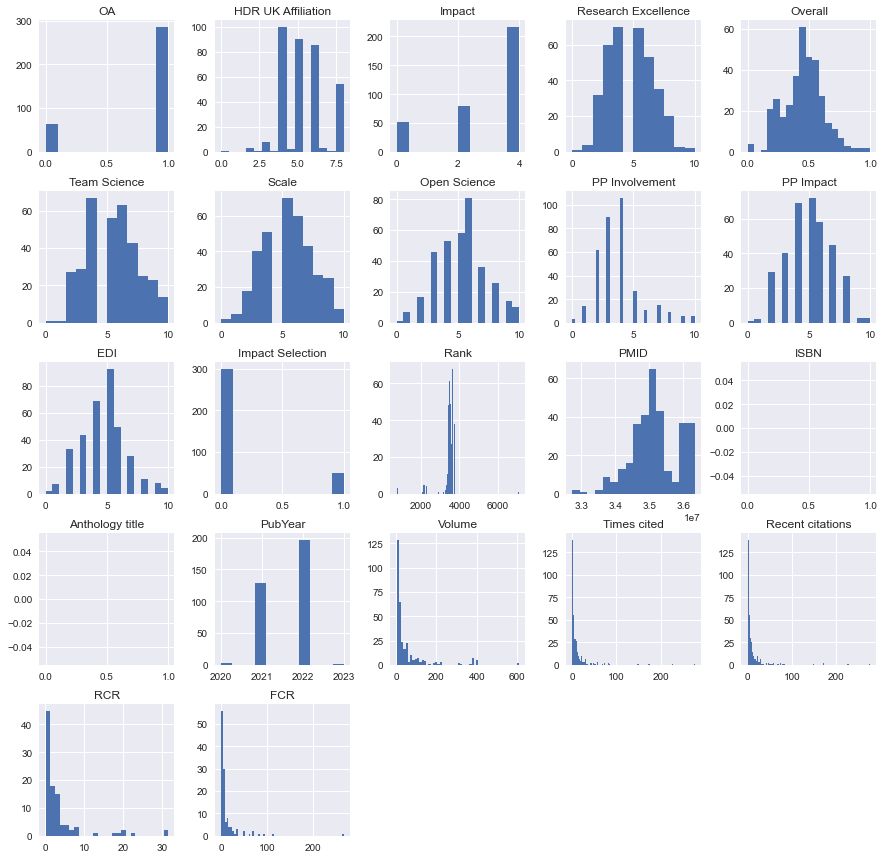

In [29]:
print("Distributions of numeric variables:")
final_df.hist(bins = "auto", figsize = (15,15));

The histograms above demonstrate:
* nature of variable (continuous vs binary)
* skew of HDR UK affiliation (to be expected as publications are initially collected on basis of mention of HDR UK)
* skew of impact (good news as HDR UK aims for impact)
* skew of PP involvement (worrying as PPI is a strategic priority for HDR UK)
* normal distribution of other variables

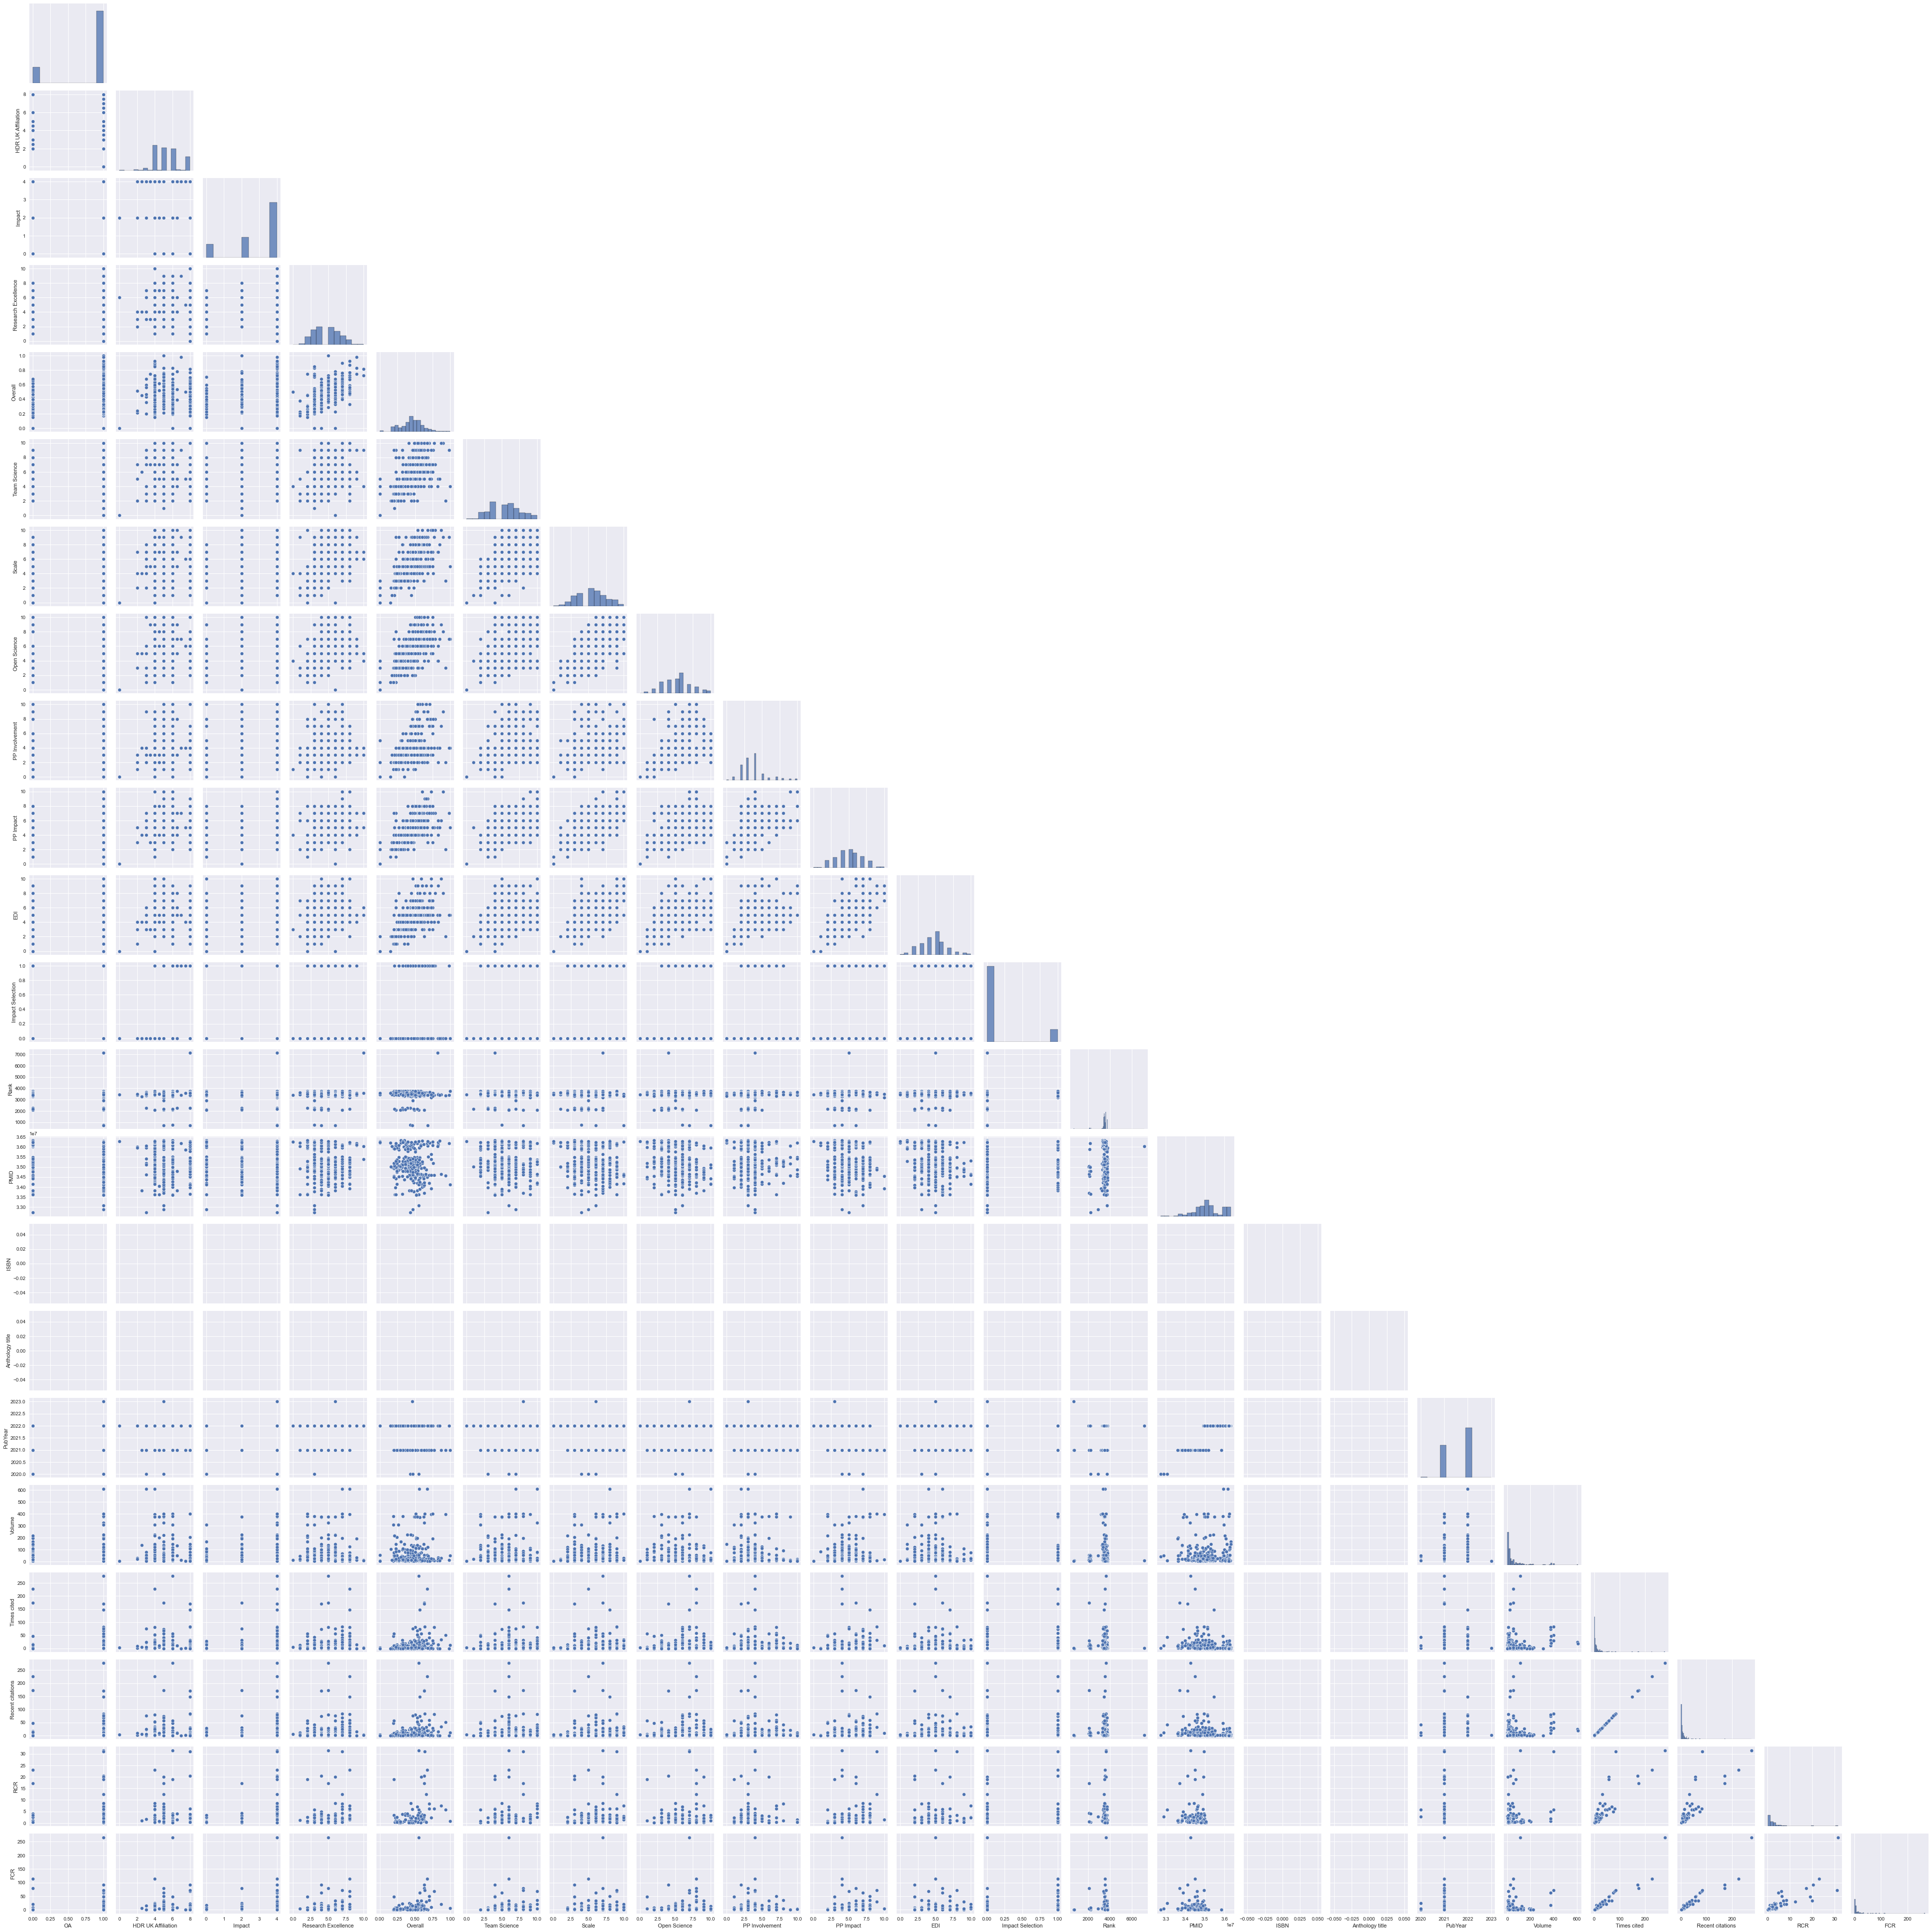

In [30]:
# lower triangle pairplot to see relationship between all variables (and Impact Selection)
sns.pairplot(final_df, corner = True);

# 3. Check for multicolinearity
Check for variable independence using a heatmap to show correlations between all the variables available in the dataset and inspect.

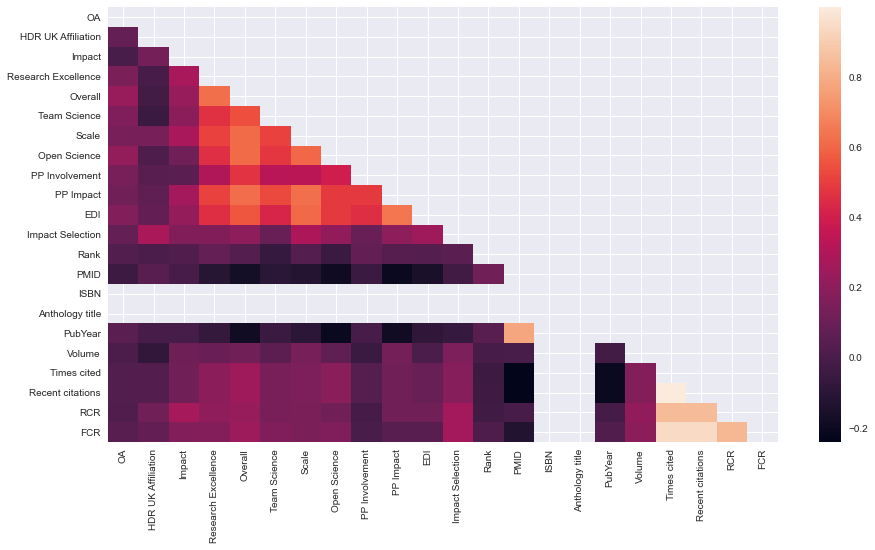

In [31]:
plt.figure(figsize = (15,8))
# correlation heatmap
sns.heatmap(final_df.corr(), mask = np.triu(np.ones_like(final_df.corr())));


The pair plot and heatmap above do not show strong relationships between any 2 variables - with the exception of (1) overall has a positive relationship with each of the variables which contribute to it and (2) citation counts and metrics have positive relationships given each of these values is a variation of the other.

In [32]:
# check correlation between two variables
final_df[["Overall", "Team Science", "Scale", "Open Science", "PP Involvement", "PP Impact"]].corr()

,Overall,Team Science,Scale,Open Science,PP Involvement,PP Impact
Overall,1.000000,0.544276,0.615370,0.612469,0.471615,0.619439
Team Science,0.544276,1.000000,0.511306,0.477146,0.325731,0.528616
Scale,0.615370,0.511306,1.000000,0.604644,0.331071,0.626934
Open Science,0.612469,0.477146,0.604644,1.000000,0.394728,0.487647
PP Involvement,0.471615,0.325731,0.331071,0.394728,1.000000,0.488700
PP Impact,0.619439,0.528616,0.626934,0.487647,0.488700,1.000000


In [33]:
final_df[["Times cited", "Recent citations", "FCR", "RCR"]].corr()

,Times cited,Recent citations,FCR,RCR
Times cited,1.000000,0.999980,0.945640,0.848777
Recent citations,0.999980,1.000000,0.946212,0.848572
FCR,0.945640,0.946212,1.000000,0.832522
RCR,0.848777,0.848572,0.832522,1.000000


In [34]:
# dropping variables with high correlation
final_df = final_df.drop("Overall", axis = 1)
final_df = final_df.drop(["Recent citations", "FCR", "RCR"], axis = 1)

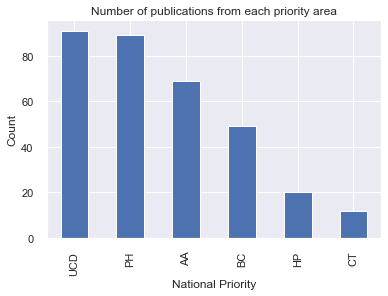

In [36]:
sns.set()
final_df['National Priority'].value_counts().nlargest(6).plot.bar()
plt.xlabel('National Priority')
plt.ylabel('Count')
plt.title('Number of publications from each priority area')
plt.show()

In [52]:
final_df['RCDC Categories'].value_counts().nlargest(10)


Clinical Research                                                                                             9
Clinical Research; Health Services                                                                            3
Clinical Research; Genetics                                                                                   3
Genetics; Human Genome                                                                                        3
Clinical Research; Clinical Trials and Supportive Activities                                                  3
Genetics                                                                                                      3
Networking and Information Technology R&D (NITRD)                                                             2
Chronic Liver Disease and Cirrhosis; Digestive Diseases; Genetics; Human Genome; Liver Disease; Prevention    2
Patient Safety                                                                                          

In [38]:
final_df['National Priority'].value_counts()[:6]

UCD    91
PH     89
AA     69
BC     49
HP     20
CT     12
Name: National Priority, dtype: int64

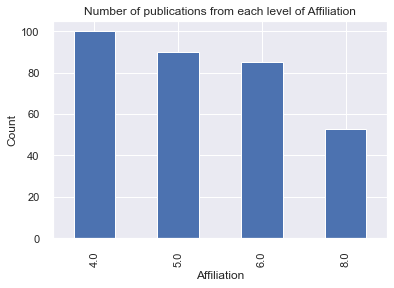

In [39]:
sns.set()
final_df['HDR UK Affiliation'].value_counts().nlargest(4).plot.bar()
plt.xlabel('Affiliation')
plt.ylabel('Count')
plt.title('Number of publications from each level of Affiliation')
plt.show()

In [54]:
final_df['HDR UK Affiliation'].value_counts()

4.0    100
5.0     90
6.0     85
8.0     53
3.0      8
2.0      3
6.5      3
4.5      2
0.0      1
7.0      1
3.5      1
2.5      1
7.5      1
Name: HDR UK Affiliation, dtype: int64

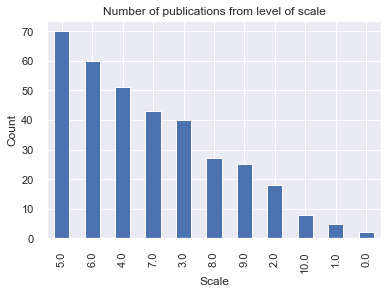

In [40]:
sns.set()
final_df['Scale'].value_counts().plot.bar()
plt.xlabel('Scale')
plt.ylabel('Count')
plt.title('Number of publications from level of scale')
plt.show()

Text(0, 0.5, 'Count')

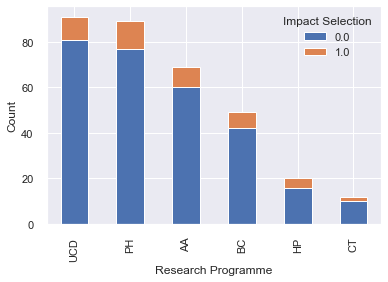

In [48]:

# Create a crosstab with the desired columns
ct = pd.crosstab(final_df['National Priority'],final_df['Impact Selection'])

# Filter the rows to only include certain values of column1
ct_filtered = ct.loc[["UCD", "PH", "AA", "BC", "HP", "CT"]]

# Capture the column labels for the plot
column_labels = list(ct.columns)

# Create the bar plot with matplotlib
ax=ct_filtered.plot(kind='bar', stacked=True)

# Set the X and Y axis labels
ax.set_xlabel("Research Programme")
ax.set_ylabel("Count")


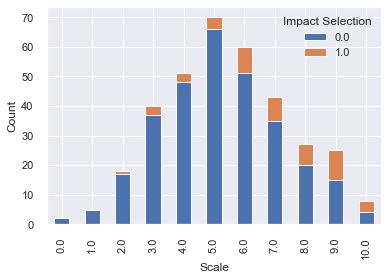

In [49]:
ct = pd.crosstab(final_df['Scale'], final_df['Impact Selection'])
ct.plot.bar(stacked=True)

# set the y-axis label
plt.ylabel('Count')

# display the chart
plt.show()

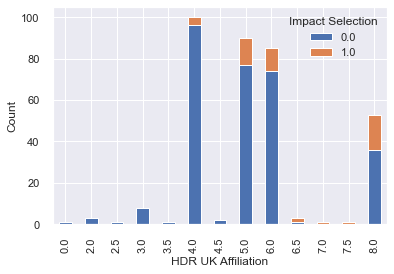

In [51]:
ct=pd.crosstab(final_df['HDR UK Affiliation'],final_df['Impact Selection'])
ct.plot.bar(stacked=True)

# set the y-axis label
plt.ylabel('Count')

# display the chart
plt.show()

# 4. Export and housekeeping

In [44]:
import sys
!{sys.executable} -m pip install watermark
%load_ext watermark 
%watermark 
%watermark --iversions

Last updated: 2023-03-27T10:39:54.904619+01:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

numpy     : 1.22.4
pandas    : 1.2.4
seaborn   : 0.11.1
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.7.1



In [45]:
import os
os.getcwd()
os.chdir('C:\\Users\\HollydawnMurray\\downloads')

#naming files with a timestamp
import time

TodaysDate = time.strftime("%d-%m-%Y")
filename = "Impact_Selection_Biblio"+ TodaysDate +".xlsx"

#export final df as an excel file for later use in modelling
final_df.to_excel(filename, index=False)  #this has created an xls file in the same directory you are working in (check downloads)
